# Trabalho final da matéria de Visualização de Dados - Pós Graduação em Data Science e Big Data - PUC/Minas

#### Neste trabalho, apresento um dataset sobre câncer, com dados de sua incidência, taxa de mortalidade, principais causas, distribuição regional e mundial, tipos de câncer mais incidentes e mais agressivos (com maior taxa de mortalidade), distribuição por IDH e uma projeção de novos casos por continente. Todos os dados foram extraídos do site da Global Cancer Observatory (GCO) e World Helth Organization (WHO). Os datasets foram baixados e tratados para serem usados nestas visualizações.

Uma breve introdução sobre o câncer: Segundo estudos, o câncer já toma a 2° posição do ranking de principais causas de morte no mundo, sendo ewaponsável por mais de 9 milhões de mortes apenas no ano de 2018. Em resumo, 1 a cada 6 mortes, no mundo, estão em direta relação com a patologia. Em Países de baixa renda, cerca de 70% das mortes ocorrem pela incidência de câncer e cerca de 1/3 das mortes por câncer se devem aos cinco principais riscos comportamentais e alimentares: alto índice de massa corporal, baixo consumo de frutas e vegetais, falta de atividade física e uso de álcool e tabaco. A apresentação tardia e o diagnóstico e tratamento inacessíveis são, infelizmente, muito comuns. Em 2017, apenas 26% dos países de baixa renda relataram ter serviços de patologia disponíveis no setor público e mais de 90% dos países de alta renda relataram que os serviços de tratamento estão disponíveis. O impacto econômico do câncer é significativo e está em constante ascendência. O custo anual total da doença, em 2010, foi estimado em aproximadamente 1,16 trilhão de dólares.

Fonte: https://www.paho.org/pt

### Importando as bibliotecas utilizadas

In [462]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import dash
from dash import dcc
from dash import html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import altair as alt
import folium
from folium import plugins
from folium.plugins import HeatMap

### Importando e convertendo o dataset utilizado

Foi necessário importar o dataset em excel, pois foi acrescentado uma coluna com dados geométricos que são uma sequência de dados separados por ',' (vírgula), o que se tornou problemático ao salvar em .csv pois era entendido que se tratavam de várias colunas. Portanto, foi realizada a importação e leitura dos dataset em .xlsx e, logo em seguida, convertido para .csv.

In [2]:
df_excel = pd.read_excel("dataset incidência (tratados com geometria).xlsx")

In [3]:
df_excel.to_csv('dataset incidência (mundo).csv')

### Importando e lendo o arquivo .csv utilizado

In [4]:
df_dados = pd.read_csv("dataset incidência (mundo).csv", encoding='iso-8859-1', dtype={"CODE": str})

df_dados.head(186)

,Unnamed: 0,Population,CODE,Geometry,Number,Uncertainty_interval,Crude_Rate,ASR_(World),Cum_risk,Mulheres,Homens
0,0,China,CHN,"MULTIPOLYGON (((123.474139 53.49740200000008, ...",4568754,[4560240.0-4577280.0],315.6,204.8,37.45,2092809,2475945
1,1,United States,USA,MULTIPOLYGON (((-155.980843424 70.913044684000...,2281658,[2277060.0-2286260.0],689.3,362.2,60.22,1055117,1226541
2,2,India,IND,MULTIPOLYGON (((93.80541992200006 6.8508057590...,1324413,[1310940.0-1338020.0],96.0,97.1,17.86,678383,646030
3,3,Japan,JPN,MULTIPOLYGON (((136.0895538330001 20.424139023...,1028658,[1026140.0-1031180.0],813.3,285.1,51.22,429415,599243
4,4,Germany,DEU,MULTIPOLYGON (((8.701318000000072 47.715254000...,628519,[626327.0-630718.0],750.2,313.2,54.01,284068,344451
...,...,...,...,...,...,...,...,...,...,...,...
179,179,Guam,GUM,MULTIPOLYGON (((144.6770629880001 13.239166260...,417,[375.2-463.4],247.1,178.1,37.78,197,220
180,180,Belize,BLZ,MULTIPOLYGON (((-88.91916656499995 15.89102745...,395,[329.1-474.1],99.3,120.9,27.19,211,184
181,181,Samoa,WSM,MULTIPOLYGON (((-171.427520752 -14.07625007599...,374,[334.2-418.5],188.5,236.4,43.87,202,172
182,182,Vanuatu,VUT,MULTIPOLYGON (((169.72253418 -20.2487773899999...,231,[152.4-350.2],75.2,108.8,20.31,123,108


### Tratando o arquivo com as colunas de interesse

In [5]:
df_dados = df_dados.drop(columns=['Unnamed: 0', 'Uncertainty_interval', 'Crude_Rate', 'ASR_(World)', 'Cum_risk'])

df_dados.head(186)

,Population,CODE,Geometry,Number,Mulheres,Homens
0,China,CHN,"MULTIPOLYGON (((123.474139 53.49740200000008, ...",4568754,2092809,2475945
1,United States,USA,MULTIPOLYGON (((-155.980843424 70.913044684000...,2281658,1055117,1226541
2,India,IND,MULTIPOLYGON (((93.80541992200006 6.8508057590...,1324413,678383,646030
3,Japan,JPN,MULTIPOLYGON (((136.0895538330001 20.424139023...,1028658,429415,599243
4,Germany,DEU,MULTIPOLYGON (((8.701318000000072 47.715254000...,628519,284068,344451
...,...,...,...,...,...,...
179,Guam,GUM,MULTIPOLYGON (((144.6770629880001 13.239166260...,417,197,220
180,Belize,BLZ,MULTIPOLYGON (((-88.91916656499995 15.89102745...,395,211,184
181,Samoa,WSM,MULTIPOLYGON (((-171.427520752 -14.07625007599...,374,202,172
182,Vanuatu,VUT,MULTIPOLYGON (((169.72253418 -20.2487773899999...,231,123,108


# 1. Incidência do câncer pelo Mundo - Visão Geral

Neste plot, podemos observar a distribuição da incidência de câncer ao longo do globo, em milhões de casos. Note que a China domina o pódium, registrando mais de 4 milhões de novos casos apenas no ano de 2020, seguido pelos Estados Unidos, que registrou números acima dos 2 milhões. O Brasil ocupa a 5º posição, tendo registrado mais de 592 mil casos no último ano.

Podemos observar uma grande discrepância na quantidade de casos entre países mais desenvolvidos em relação a países emergentes, como a África. Pode ser um indício de que países mais desenvolvidos possuem mais fatores de contribuição para o desenvolvimento de câncer, como poluição, industrializados, eletrônicos, radiações, etc.

Fonte: <https://gco.iarc.fr/today/home>

### Lendo o arquivo .csv convertido anteriormente, configurando e plotando um World Choropleth Map interativo com a biblioteca Plotly (graph_objects)

In [8]:
df = pd.read_csv('dataset incidência (mundo).csv')

fig = go.Figure(data=go.Choropleth(
    locations = df['CODE'], 
    z = df['Number'],
    text = df['Population'],
    colorscale = 'Aggrnyl',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.3,
    colorbar_title = 'Nº de Casos'),
)

fig.update_layout(
    margin = {"r":3,"t":40,"l":1,"b":10},
    title_text='Incidência de câncer no Mundo',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='cylindrical stereographic',
        bgcolor = 'black',
        landcolor = 'grey',
        lakecolor = 'grey'
        
    ),
    
    annotations = [dict(
        x=-5,
        y=1,
        xref='paper',
        yref='paper',
         text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()

# 2. Relação dos índices de mortalidade e incidência, por sexo

Observando os dados abaixo, pode-se concluir que tanto a taxa de mortalidade quanto a incidência possuem maior indíce no sexo Masculino. Em relação a este resultado, sabemos que há um grande tabu em relação a saúde preventiva masculina o que pode ter contribuído principalemte para as altas taxas de mortalidade. Isso, pois, quando falamos sobre câncer, a prevenção é fundamental para deter a evolução da doença.

### Importando e lendo os arquivos que serão utilizados

In [6]:
data = pd.read_csv('incidência_mortalidade3.csv', encoding='iso-8859-1')

data.head()

,Status,Homens,Mulheres
0,Incidência,10065305,9227484
1,Mortalidade,5528810,4429323


In [7]:
fig = go.Figure(data=[
    go.Bar(name='Homens', x=data['Status'], y=data['Homens'], width=[0.1, 0.1], 
    marker_color = 'royalblue'),
    go.Bar(name='Mulheres', x=data['Status'], y=data['Mulheres'], width=[0.1, 0.1],
    marker_color = 'hotpink')
])
# Change the bar mode
fig.update_layout(barmode='group', bargap = 0.8, bargroupgap = 0.2)

fig.update_traces(width=0.1, error_x_width=0.1, selector=dict(type='bar'))

fig.update_layout(title_text='Incidência x Mortalidade por Sexo')

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.show()

# 3. Tipos de câncer com maior incidência no Mundo

Com essa visualização, podemos facilmente observar quais são so tipos de câncer mais incidentes. Câncer de mama, pulmão, colorretal e de próstata, estão entre os tipos que mais registram casos pelo globo.

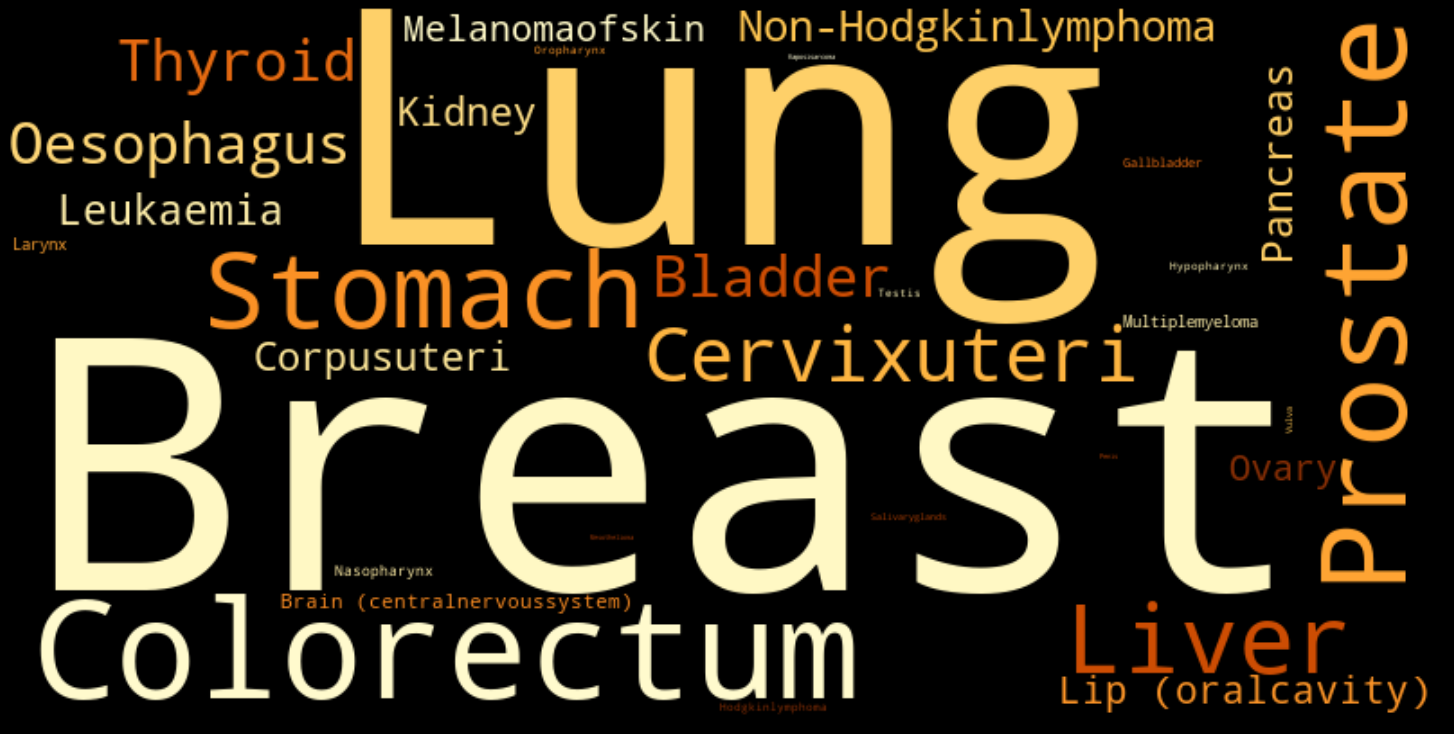

In [8]:
df = pd.read_csv('tipos de câncer - incidência.csv')

records = df.to_dict(orient='records')
data = {x['Cancer']: x['Number'] for x in records}
colors = {x['Cancer']: x['Number'] for x in records}

wc = WordCloud(background_color="black", max_words=1000, colormap="YlOrBr", width=800, height=400)
wc.generate_from_frequencies(data)

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.margins(x=0, y=0) 
plt.show()

# 4. Mundo: Relação de Incidência x Mortalidade por tipo de câncer

Neste gráfico conseguimos observar os tipos de câncer e as taxas de mortalidade de cada um. O câncer de pulmão é visivelmente considerado mais agresivo, pois de 2 milhões de casos, mais de 1 milhão e 700 mil morrem em decorrência da doença. Isso nos dá uma taxa de aproximadamente 19% de sobrevicência. O ranking é seguido pelo câncer colorretal, com uma taxa aproximadamente 48% de mortalidade.

In [9]:
a = pd.read_csv('incidência tipo de câncer.csv')

In [10]:
a.head()

,ICD,Cancer,Number,Uncertainty interval,Crude Rate,ASR (World),Cum. risk
0,C50,Breast,2261419,[2244260.0-2278710.0],58.5,47.8,7.97
1,C33-34,Lung,2206771,[2176530.0-2237430.0],28.3,22.4,6.08
2,C18-21,Colorectum,1931590,Notavailable,24.8,19.5,-
3,C61,Prostate,1414259,[1395310.0-1433460.0],36.0,30.7,9.27
4,C16,Stomach,1089103,[1066580.0-1112100.0],14.0,11.1,3.03


In [11]:
a = a.drop(columns=['Uncertainty interval', 'Crude Rate', 'ASR (World)', 'Cum. risk'])

a.head()

,ICD,Cancer,Number
0,C50,Breast,2261419
1,C33-34,Lung,2206771
2,C18-21,Colorectum,1931590
3,C61,Prostate,1414259
4,C16,Stomach,1089103


In [12]:
b = pd.read_csv('mortalidade tipo de câncer.csv')

b.head()

,ICD,Cancer,Number
0,C33-34,Lung,1796144
1,C18-21,Colorectum,935173
2,C22,Liver,830180
3,C16,Stomach,768793
4,C50,Breast,684996


In [13]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = b['Cancer'],
        y = b['Number'],
        name = 'Mortalidade',
        marker_color = 'red'
    ))

fig.add_trace(
    go.Bar(
        x = a['Cancer'],
        y = a['Number'],
        name = 'Incidência',
        marker_color = 'blue',
        opacity = 0.4
    ))

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.update_layout(title_text='Incidência x Mortalidade por tipos de Câncer') 

fig.show()

# 5. Relação câncer x principais causas

Neste plot vemos a relação de 3 principais causas ditribuídas por continentes que contribuem para o surgimento de novos casos de câncer. O alcoolismo fica em primeiro lugar, seguido pelo fator de exposição a radiação UV.

In [14]:
alcool = pd.read_csv('alcool por continente.csv', encoding='iso-8859-1')

obesidade = pd.read_csv('obesidade por continente.csv', encoding='iso-8859-1')

radiação_uv = pd.read_csv('radiação uv por continente.csv', encoding='iso-8859-1')

In [15]:
alcool.head()

,Rank,Continent,Number of attributable cases,Percentage
0,1,Asia,430000,58.1%
1,2,Europe,180000,24.3%
2,3,TheAmericas,98000,13.2%
3,4,Africa,23000,3.1%
4,5,Oceania,6900,0.9%


In [16]:
obesidade.head()

,Rank,Continent,Attributable cases,Percentage
0,1,Europe,200000,40.5%
1,2,The Americas,150000,32.1%
2,3,Asia,110000,22.7%
3,4,Africa,15000,3.1%
4,5,Oceania,7500,1.6%


In [17]:
radiação_uv.head()

,Rank,Continent,Number of attributable cases,Percentage
0,1,Europe,78000,46.4%
1,2,The Americas,71100,42.3%
2,3,Oceania,13900,8.3%
3,4,Africa,2790,1.7%
4,5,Asia,2180,1.3%


In [18]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=alcool['Continent'], values=alcool['Number of attributable cases'], name="Álcool"),
              1, 1)
fig.add_trace(go.Pie(labels=obesidade['Continent'], values=obesidade['Attributable cases'], name="Obesidade"),
              1, 2)
fig.add_trace(go.Pie(labels=radiação_uv['Continent'], values=radiação_uv['Number of attributable cases'], name="Radiação UV"),
              1, 3)

fig.update_traces(hole=.5, hoverinfo="label+value")

fig.update_layout(
    title_text="% dos casos de câncer x principais causas no Mundo, em 2012",
    annotations=[dict(text='Álcool', x=0.12, y=0.5, font_size=20, showarrow=False),
                 dict(text='Obesidade', x=0.5, y=0.5, font_size=20, showarrow=False),
                 dict(text='Radiação UV', x=0.90, y=0.5, font_size=19, showarrow=False)])
fig.show()

# 6. Pirâmide etária câncer x índice de mortalidade no Brasil

Pode-se concluir que tanto a incidência quanto a mortalidade atingem mais a população idosa, chegando a mais de 50% a taxa de mortalidade na faixa etária de 70 anos a 85+.

In [384]:
dados = pd.read_csv("incidência-mortalidade por idade.csv", encoding='iso-8859-1')

dados

,Population,Incidência,Mortalidade,Porcentagem,Age
0,Brazil,4341,1291,29.7%,0-9
1,Brazil,4567,1411,30.9%,10-19
2,Brazil,12191,2964,24.3%,20-29
3,Brazil,29004,7842,27.0%,30-39
4,Brazil,57176,18736,32.8%,40-49
5,Brazil,113449,43244,38.1%,50-59
6,Brazil,156057,65393,41.9%,60-69
7,Brazil,215427,119068,55.3%,70-85+


In [431]:
faixa_etária = dados['Age']
incidência = dados['Incidência']
mortalidade = dados['Mortalidade'] * -1

fig = go.Figure()

fig.add_trace(go.Bar(y= faixa_etária, x = incidência,
					name = 'Incidência',
					orientation = 'h', marker_color='rgb(500,150,150)'))

fig.add_trace(go.Bar(y = faixa_etária, x = mortalidade,
					name = 'Mortalidade', orientation = 'h', marker_color='rgb(90,150,50)'))

fig.update_layout(title = 'Pirâmide etária: casos x mortalidade no Brasil',
				title_font_size = 22, barmode = 'relative',
				bargap = 0.0, bargroupgap = 0,
				xaxis = dict(tickvals = [-120000, -90000, -60000, -30000, -10000, 0, 10000, 30000, 60000, 90000, 120000, 150000, 190000, 220000],
								
							ticktext = ['120.000', '90.000', '60.000', '30.000', '10.000', '0', '10.000', '30.000', '60.000', '90.000', '120.000', '150.000', '1980.000', '220.000'],
								
							title = 'Faixa etária',
							title_font_size = 14)
				)

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()



# 7. Taxa de mortalidade por IDH

Este dado nos mostra a taxa de incidência e de mortalidade distribuídos por IDH (Índice de Desenvolvimento Humano). Claramente, vemos que em Países que possuem o IDH baixo (Low IDH), são so que apresentam maior taxa de mortalidade em relação aos casos (incidência). 

In [21]:
idh = pd.read_csv("dados por IDH.csv", encoding='iso-8859-1')

idh

,Population,Incidência,Mortalidade,Taxa mortalidade
0,Very high HDI,7371321,3478767,47.2%
1,High HDI,8934818,4521833,50.6%
2,India,1324413,851678,64.3%
3,Medium HDI,2326749,1513219,65.0%
4,China,4568754,3002899,65.7%
5,Low HDI,650423,439852,67.6%


In [22]:
bars = alt.Chart(idh, title='Relação taxa de mortalidade por incidência em diferentes IDHs').mark_bar('center').encode(
    x='Incidência',
    y='Taxa mortalidade',
    color=alt.Color('Population', scale=alt.Scale(scheme='dark2'))
).properties(
    width=800,
    height=500
)

bars.configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=12,
    cornerRadius=10,
    orient='bottom-right')

bars.configure_title(fontSize=24)

alt.Chart(...)

# 8. Visão geral dos casos de câncer no Brasil - Prospecção do ano de 2020

O INCA realizou este levantamento com o registro de número de casos por região do Brasil, para o ano de 2020. Aqui conseguimos observar as regiões com maior incidência de novos casos e a distribuição pelo País. 


Fonte: https://www.inca.gov.br/

In [483]:
bra_dados = pd.read_csv('data_brasil_estados.csv', encoding='iso-8859-1')

bra_dados.head()

,Estado,UF,LAT,LON,Todas as neoplasias malignas
0,Acre,AC,-8.77,-70.55,1240
1,Alagoas,AL,-9.62,-36.82,6090
2,Amapa,AP,1.41,-51.77,870
3,Amazonas,AM,-3.47,-65.10,5410
4,Bahia,BA,-13.29,-41.71,32590


In [484]:
bra_dados = bra_dados.drop(columns=['Estado', 'UF'])

In [474]:
bra_dados.head()

,LAT,LON,Todas as neoplasias malignas
0,-8.77,-70.55,1240
1,-9.62,-36.82,6090
2,1.41,-51.77,870
3,-3.47,-65.10,5410
4,-13.29,-41.71,32590


In [529]:
braMap = folium.Map(whidth = "100%", height = '100%', location = [-15.788497, -47.879873], zoom_start = 3, tiles = 'Stamen Terrain')

In [530]:
braMap = braMap.add_child(plugins.HeatMap(bra_dados))

In [487]:
dados_bra = pd.read_csv('data_brasil_estados.csv', encoding='iso-8859-1')

dados_bra.head()

,Estado,UF,LAT,LON,Todas as neoplasias malignas
0,Acre,AC,-8.77,-70.55,1240
1,Alagoas,AL,-9.62,-36.82,6090
2,Amapa,AP,1.41,-51.77,870
3,Amazonas,AM,-3.47,-65.10,5410
4,Bahia,BA,-13.29,-41.71,32590


In [490]:
dados_bra.iloc[0]['LAT']

-8.77

In [491]:
dados_bra.iloc[0]['Estado']

'Acre'

In [577]:
for i in range(0, len(dados_bra)):
    
    folium.Circle(location = [dados_bra.iloc[i]['LAT'], dados_bra.iloc[i]['LON']], 
                    color = '#010103', 
                    fill='#234175', 
                    tooltip = '<li><bold> Estado: ' + str(dados_bra.iloc[i]['Estado']) +
                              '<li><bold> UF: ' + str(dados_bra.iloc[i]['UF']) +
                              '<li><bold> Casos de câncer: ' + str(dados_bra.iloc[i]['Todas as neoplasias malignas']),
                    radius = (dados_bra.iloc[i]['Todas as neoplasias malignas']**1.1)   

).add_to(braMap)

braMap


# 9. Brasil : Tipos de câncer mais incidentes e taxa de mortalidade

Aqui observamos quais são os tipos de carcinoma que mais incidem no Brasil, seguido pela respectiva taxa de mortalidade. Conseguimos observar que câncers do tipo pâncreas, esôfago e fígado, possuem as maiores taxas de mortes em relação ao número de casos. São câncers bastante agressivos e que, se descobertos mais tarde, praticamente não haverão cura. A chancer de ocorrer metástase (espalhamento das células câncerígenas para outros órgãos e tecidos, pela corrente sanguínea) nestes casos, são maiores principalmente por sua agressividade, o que torna a taxa de sobrevivência ainda menor.


Fonte: https://www.inca.gov.br/

In [574]:
brasil_tipos = pd.read_csv('brasil_tipos.csv', encoding='iso-8859-1')

brasil_tipos.head()

,CID,Câncer,Incidência,Mortalidade,Taxa de mortalidade
0,C67,Bexiga,15854,5630,35.5%
1,C70-72,Cérebro (sistema nervoso central),12260,10920,89.1%
2,C50,Seio,88492,20725,23.4%
3,C53,Colo de útero,17743,9168,51.7%
4,C18-21,Cólon,55102,26170,47.5%


In [576]:
px.scatter(brasil_tipos, x='Incidência', y='Mortalidade', size='Incidência', size_max=100, color='Câncer',
log_x=True, hover_name='CID', hover_data=brasil_tipos.columns, height=700,
template='plotly_dark', title='Tipos de câncer incidentes no Brasil e as respectivas taxas de mortalidade')

# 10. About time: Projeção de novos casos até 2040

Esse gráfico apresenta dados de incidência de novos casos separados por continente, do ano de 2020 e com a estimativa desses números até o ano de 2040. Nos deparamos com um dado crescente. Pode-se inferir que se deva ao também aumento da população mundial ao longo dos anos. Com o tempo médio de vida crescendo constantemente, temos uma população que vive cada vez mais, impactando diretamente no número de habitantes no mundo e, consequentemente, na média de casos novos. Um exemplo disso é a Ásia, que salta aos olhos no gráfico justamente por ser o continente mais populoso. Por lá, a previsão é de que, em 2040, surjam mais de 15 milhoes de novos casos da doença.

In [34]:
proj = pd.read_csv("comparação 2020-2040_2.csv", encoding='iso-8859-1')

proj

,Population,Ano,Novos Casos
0,Africa,2020,1109209
1,Asia,2020,9503710
2,Europe,2020,4398443
3,Latin America and Caribbean,2020,1470274
4,Northern America,2020,2556862
5,Oceania,2020,254291
6,Africa,2025,1300771
7,Asia,2025,10865865
8,Europe,2025,4662744
9,Latin America and Caribbean,2025,1688680


In [35]:
proj.columns

Index(['Population', 'Ano', 'Novos Casos'], dtype='object')

In [430]:
years = [2020, 2025, 2030, 2035, 2040]

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=[9503710, 10865865, 12290655, 13738601, 15130778],
                name='Ásia',
                marker_color='rgb(184,134,11)'
                ))
fig.add_trace(go.Bar(x=years,
                y=[4398443, 4662744, 4913808, 5142033, 5323141],
                name='Europa',
                marker_color='rgb(70,130,180)'
                ))
fig.add_trace(go.Bar(x=years,
                y=[2556862, 2815471, 3070906, 3317886, 3525597],
                name='América do Norte',
                marker_color='rgb(255,99,71)'
                ))
fig.add_trace(go.Bar(x=years,
                y=[1470274, 1688680, 1925663, 2177249, 2435315],
                name='América Latina e Caribe',
                marker_color='rgb(34,139,34)'
                ))
fig.add_trace(go.Bar(x=years,
                y=[1109209, 1300771, 1527194, 1791960, 2097365],
                name='África',
                marker_color='rgb(199,21,133)'
                ))
fig.add_trace(go.Bar(x=years,
                y=[254291, 284914, 316180, 346793, 375744],
                name='Oceania',
                marker_color='rgb(139,0,0)'
                ))

fig.update_layout(
    title='Linha do tempo - Surgimento de novos casos com prospecção até 2040',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='N° de casos (em milhões)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(100,100,100)',
        bordercolor='rgba(0,0,0)'
    ),
    barmode='group',
    bargap=0.2,
    bargroupgap=0.3
)

fig.update_layout(plot_bgcolor='black',
paper_bgcolor = 'black')

fig.show()